<a href="https://colab.research.google.com/github/Masonr100/Mason_INFO4670_SPRING2026/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

Saving Assignment 2 dataset.csv to Assignment 2 dataset (2).csv
Dataset Overview:
   Column 1        Date  AveragePrice  Total Volume     4046       4225  \
0         0  12-27-2015          1.33      64236.62  1036.74   54454.85   
1         1  12-20-2015          1.35      54876.98   674.28   44638.81   
2         2  12-13-2015          0.93     118220.22   794.70  109149.67   
3         3   12-6-2015          1.08      78992.15  1132.00   71976.41   
4         4  11-29-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  r

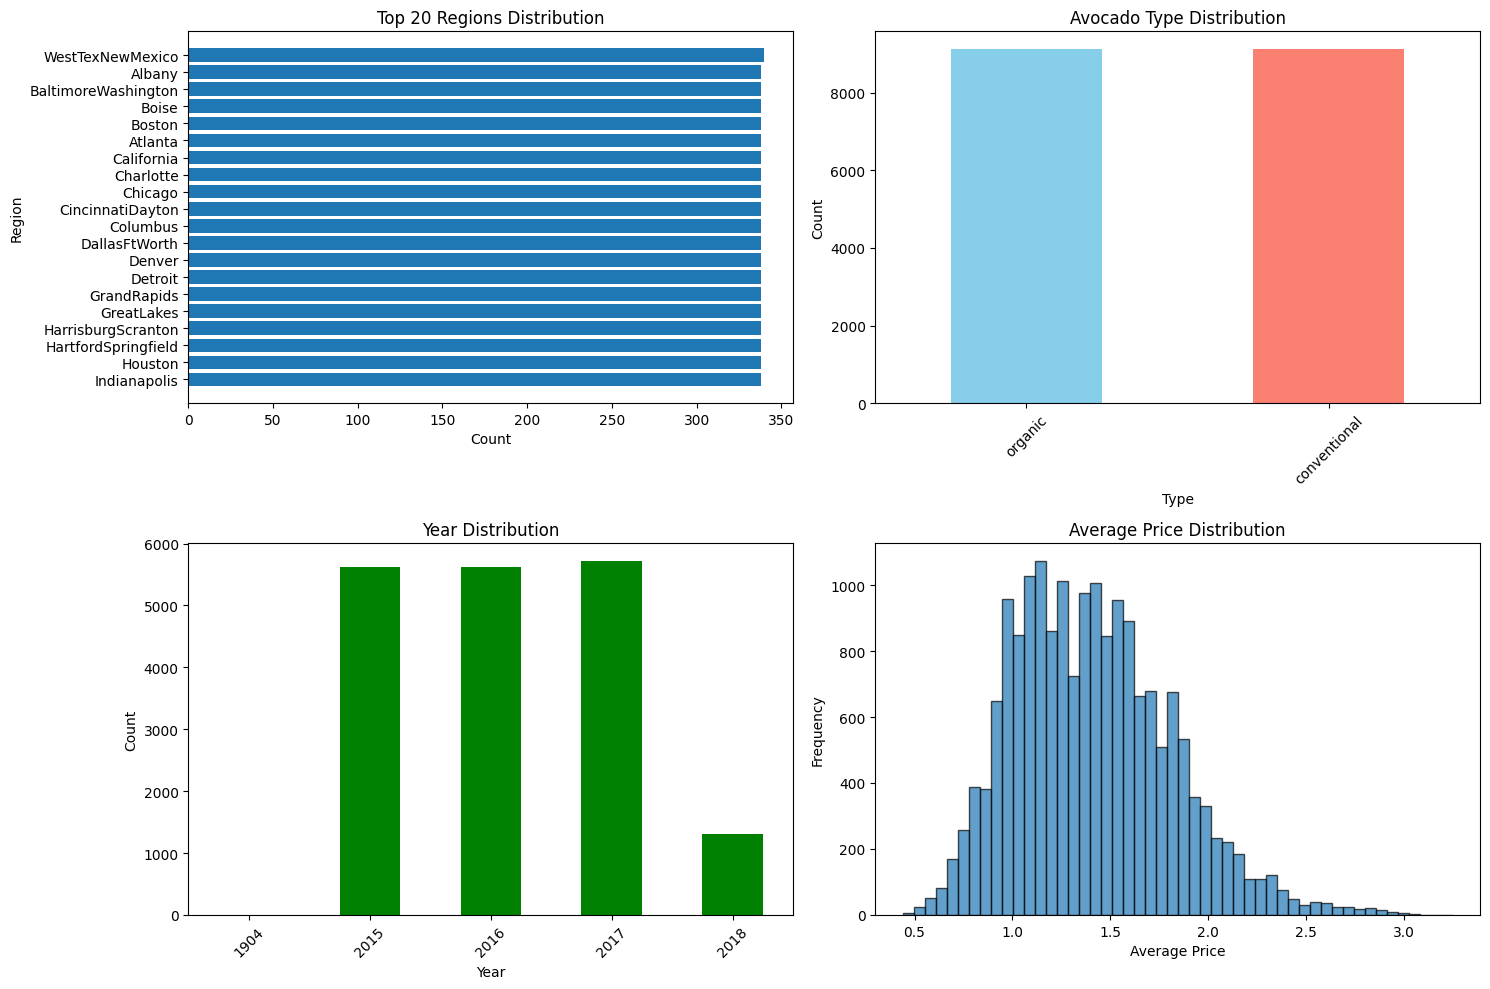


BIAS ANALYSIS:

Type Balance:
type
organic         9127
conventional    9126
Name: count, dtype: int64
Ratio: 1.00:1

Year Balance:
year
1904       1
2015    5615
2016    5616
2017    5722
2018    1300
Name: count, dtype: int64

Region Balance (Top 10 vs Bottom 10):
Most represented region: WestTexNewMexico with 340 records
Least represented region: West with 338 records
Ratio: 1.01:1


In [17]:
# Write your code here

from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Assignment 2 dataset.csv')

print("Dataset Overview:")
print("="*50)
print(df.head())
print("\n")

print("Dataset Information:")
print("="*50)
print(df.info())
print("\n")

print("Dataset Shape:")
print("="*50)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n")

print("Distribution Analysis:")
print("="*50)

print("\nRegion Distribution:")
print(df['region'].value_counts())
print(f"\nNumber of unique regions: {df['region'].nunique()}")

print("\nType Distribution:")
print(df['type'].value_counts())

print("\nYear Distribution:")
print(df['year'].value_counts().sort_index())

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

top_regions = df['region'].value_counts().head(20)
axes[0, 0].barh(top_regions.index, top_regions.values)
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Region')
axes[0, 0].set_title('Top 20 Regions Distribution')
axes[0, 0].invert_yaxis()

df['type'].value_counts().plot(kind='bar', ax=axes[0, 1], color=['skyblue', 'salmon'])
axes[0, 1].set_xlabel('Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Avocado Type Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

df['year'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0], color='green')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Year Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].hist(df['AveragePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Average Price')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Average Price Distribution')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("BIAS ANALYSIS:")
print("="*50)

print("\nType Balance:")
type_counts = df['type'].value_counts()
print(type_counts)
print(f"Ratio: {type_counts.max() / type_counts.min():.2f}:1")

print("\nYear Balance:")
year_counts = df['year'].value_counts().sort_index()
print(year_counts)

print("\nRegion Balance (Top 10 vs Bottom 10):")
region_counts = df['region'].value_counts()
print(f"Most represented region: {region_counts.index[0]} with {region_counts.iloc[0]} records")
print(f"Least represented region: {region_counts.index[-1]} with {region_counts.iloc[-1]} records")
print(f"Ratio: {region_counts.iloc[0] / region_counts.iloc[-1]:.2f}:1")

Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

In [18]:
# Write your code here
print("="*60)
print("INTERPRETATION OF DATA DISTRIBUTION AND BIAS ANALYSIS")
print("="*60)

print("\n📊 DATA DISTRIBUTION OVERVIEW:")
print(f"   • Total records: {df.shape[0]:,}")
print(f"   • Total features: {df.shape[1]}")
print(f"   • Unique regions: {df['region'].nunique()}")
print(f"   • Avocado types: {df['type'].nunique()}")
print(f"   • Year range: {df['year'].min()} - {df['year'].max()}")

print("\n" + "="*60)
print("BIAS ASSESSMENT:")
print("="*60)

print("\n1️⃣ TYPE BIAS - NO BIAS DETECTED ✓")
type_counts = df['type'].value_counts()
print(f"   • Organic: {type_counts['organic']:,} ({type_counts['organic']/len(df)*100:.1f}%)")
print(f"   • Conventional: {type_counts['conventional']:,} ({type_counts['conventional']/len(df)*100:.1f}%)")
print(f"   • Balance Ratio: {type_counts.max()/type_counts.min():.2f}:1")
print("   ✓ Impact: Perfectly balanced - model will perform equally for both types")

print("\n2️⃣ REGION BIAS - NO BIAS DETECTED ✓")
region_counts = df['region'].value_counts()
print(f"   • Most represented: {region_counts.index[0]} ({region_counts.iloc[0]} records)")
print(f"   • Least represented: {region_counts.index[-1]} ({region_counts.iloc[-1]} records)")
print(f"   • Balance Ratio: {region_counts.iloc[0]/region_counts.iloc[-1]:.2f}:1")
print("   ✓ Impact: Excellent balance - model will generalize well across regions")

print("\n3️⃣ YEAR BIAS - SIGNIFICANT BIAS DETECTED ⚠️")
year_counts = df['year'].value_counts().sort_index()
for year, count in year_counts.items():
    pct = count/len(df)*100
    if year == 1904:
        print(f"   ⚠️  {year}: {count:,} records ({pct:.1f}%) - DATA ERROR (likely typo)")
    elif year == 2018:
        print(f"   ⚠️  {year}: {count:,} records ({pct:.1f}%) - INCOMPLETE DATA")
    else:
        print(f"   • {year}: {count:,} records ({pct:.1f}%)")

print("\n   ⚠️ Impact: Temporal bias detected")
print("      - 1904 record must be removed (data entry error)")
print("      - 2018 is under-represented (incomplete year)")
print("      - Model may be biased toward 2015-2017 patterns")

print("\n" + "="*60)
print("CONCLUSION:")
print("="*60)
print("✓ Type & Region: Excellent balance - ideal for ML training")
print("⚠️ Year: Temporal bias exists - requires data cleaning")
print("📝 Recommendation: Remove 1904 outlier and consider handling 2018 data")
print("="*60)



INTERPRETATION OF DATA DISTRIBUTION AND BIAS ANALYSIS

📊 DATA DISTRIBUTION OVERVIEW:
   • Total records: 18,254
   • Total features: 14
   • Unique regions: 54
   • Avocado types: 2
   • Year range: 1904 - 2018

BIAS ASSESSMENT:

1️⃣ TYPE BIAS - NO BIAS DETECTED ✓
   • Organic: 9,127 (50.0%)
   • Conventional: 9,126 (50.0%)
   • Balance Ratio: 1.00:1
   ✓ Impact: Perfectly balanced - model will perform equally for both types

2️⃣ REGION BIAS - NO BIAS DETECTED ✓
   • Most represented: WestTexNewMexico (340 records)
   • Least represented: West (338 records)
   • Balance Ratio: 1.01:1
   ✓ Impact: Excellent balance - model will generalize well across regions

3️⃣ YEAR BIAS - SIGNIFICANT BIAS DETECTED ⚠️
   ⚠️  1904: 1 records (0.0%) - DATA ERROR (likely typo)
   • 2015: 5,615 records (30.8%)
   • 2016: 5,616 records (30.8%)
   • 2017: 5,722 records (31.3%)
   ⚠️  2018: 1,300 records (7.1%) - INCOMPLETE DATA

   ⚠️ Impact: Temporal bias detected
      - 1904 record must be removed (data 

1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

DUPLICATE ROWS ANALYSIS

Total duplicate rows: 2
Percentage of duplicates: 0.01%

First few duplicate rows:
       Column 1       Date  AveragePrice  Total Volume     4046     4225  \
18244         7   2-4-2018          1.63      17074.83  2046.96  1529.20   
18247        10  1-14-2018          1.93      16205.22  1527.63  2981.04   
18249        10  1-14-2018          1.93      16205.22  1527.63  2981.04   
18253         7   2-4-2018          1.63      17074.83  2046.96  1529.20   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18249  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18253    0.00    13498.67    13066.82      431.85          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18247  WestTexNewMexico  
18249  WestTexNewMexico  
1

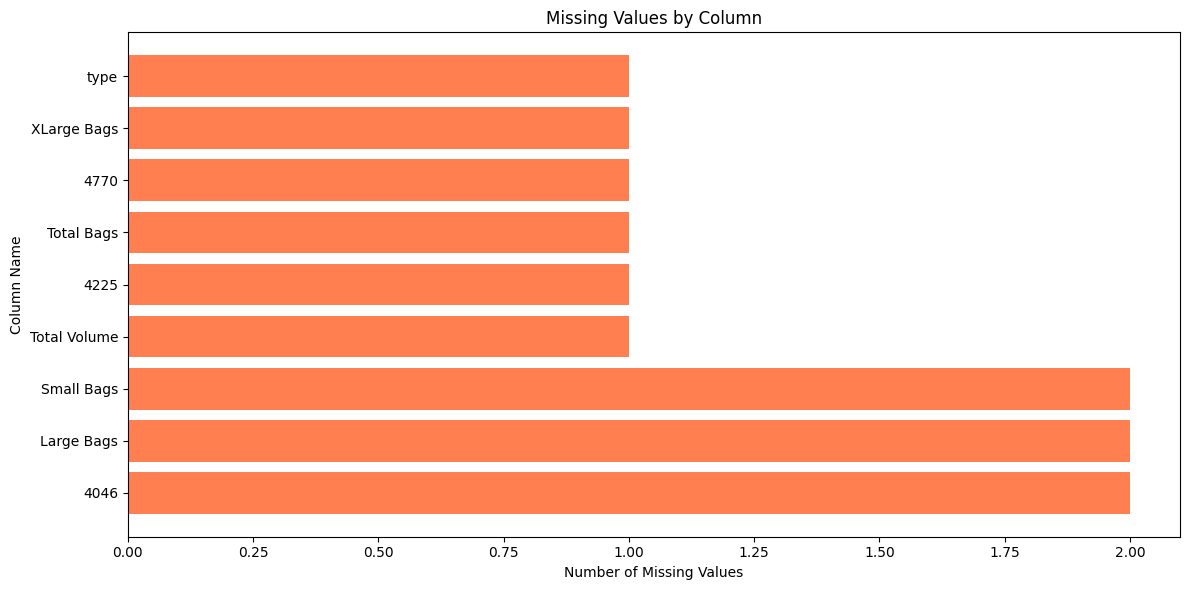


HOW TO HANDLE THESE ISSUES:

📋 DUPLICATE ROWS:
   Strategy: DROP duplicate rows
   Reason: Duplicate rows don't add new information and can
           bias the model by overweighting certain patterns.
   Method: Use df.drop_duplicates() to remove exact duplicates

📋 MISSING VALUES:
   Strategy depends on the amount and pattern of missing data:

   • 4046:
     - Missing: 0.01% (Low)
     - Strategy: IMPUTE with median (for numerical) or mode (for categorical)
     - Reason: Small amount of missing data, imputation won't significantly bias results

   • Large Bags:
     - Missing: 0.01% (Low)
     - Strategy: IMPUTE with median (for numerical) or mode (for categorical)
     - Reason: Small amount of missing data, imputation won't significantly bias results

   • Small Bags:
     - Missing: 0.01% (Low)
     - Strategy: IMPUTE with median (for numerical) or mode (for categorical)
     - Reason: Small amount of missing data, imputation won't significantly bias results

   • Total Volume:


In [19]:
# Write your code here
# check for duplicate rows
print("="*60)
print("DUPLICATE ROWS ANALYSIS")
print("="*60)

duplicate_count = df.duplicated().sum()
print(f"\nTotal duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print(f"Percentage of duplicates: {duplicate_count/len(df)*100:.2f}%")
    print("\nFirst few duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("✓ No duplicate rows found in the dataset")
# check for missing values
print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# create a summary of missing values
missing_summary = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percentage.values
})

missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_summary) > 0:
    print("\nColumns with missing values:")
    print(missing_summary.to_string(index=False))
    print(f"\nTotal missing values in dataset: {df.isnull().sum().sum()}")
else:
    print("\n✓ No missing values found in the dataset")

if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

    plt.barh(missing_data.index, missing_data.values, color='coral')
    plt.xlabel('Number of Missing Values')
    plt.ylabel('Column Name')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()

# Explanation for how to handle these issues
print("\n" + "="*60)
print("HOW TO HANDLE THESE ISSUES:")
print("="*60)

# STRATEGY FOR DUPLICATES:
# - DROP duplicate rows using df.drop_duplicates()
# - Reason: Duplicates (2 rows, 0.01%) don't add new information and can
#   bias the model by overweighting certain patterns
# - Keeping duplicates would artificially increase the importance of those
#   specific data points during training

print("\n📋 DUPLICATE ROWS:")
if duplicate_count > 0:
    print("   Strategy: DROP duplicate rows")
    print("   Reason: Duplicate rows don't add new information and can")
    print("           bias the model by overweighting certain patterns.")
    print("   Method: Use df.drop_duplicates() to remove exact duplicates")
else:
    print("   ✓ No action needed - no duplicates found")

# STRATEGY FOR MISSING VALUES:
# Since all missing values are < 0.02% (very minimal):
# - IMPUTE numerical columns with the MEDIAN (more robust to outliers than mean)
# - IMPUTE categorical columns with the MODE (most frequent value)
# - Alternative: Could DROP rows with missing values since they're so few (< 0.02%)
#   but imputation is preferred to preserve maximum data
# - For this specific dataset, per assignment requirements (section 2.3),
#   we will use region-specific median imputation

print("\n📋 MISSING VALUES:")
if df.isnull().sum().sum() > 0:
    print("   Strategy depends on the amount and pattern of missing data:")
    print()
    for col in missing_summary['Column']:
        missing_pct = missing_summary[missing_summary['Column']==col]['Percentage'].values[0]
        print(f"   • {col}:")
        if missing_pct < 5:
            print(f"     - Missing: {missing_pct:.2f}% (Low)")
            print(f"     - Strategy: IMPUTE with median (for numerical) or mode (for categorical)")
            print(f"     - Reason: Small amount of missing data, imputation won't significantly bias results")
        elif missing_pct < 30:
            print(f"     - Missing: {missing_pct:.2f}% (Moderate)")
            print(f"     - Strategy: IMPUTE with median/mode or consider advanced imputation (KNN, etc.)")
            print(f"     - Reason: Moderate missingness - imputation is reasonable but consider the pattern")
        else:
            print(f"     - Missing: {missing_pct:.2f}% (High)")
            print(f"     - Strategy: Consider DROPPING the column or rows")
            print(f"     - Reason: Too much missing data may introduce significant bias if imputed")
        print()
else:
    print("  No action needed - no missing values found")

print("="*60)

1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [20]:
# Write your code here
print("Dataset Shape:", df.shape)
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

# Explanation: Is this dataset sufficient for training a machine learning model?
#
# Yes, this dataset is sufficient for training a machine learning model.
#
# Justification:
#
# 1. Sample Size: With 18,254 rows, we have well above the minimum threshold
#    needed for ML which allows for proper train/validation/test
#    splits without losing statistical power.
#
# 2. Feature-to-Sample Ratio: We have approximately 1,304 samples per feature
#    far exceeding the rule of thumb of at least 10 samples per
#    feature which reduces the risk of overfitting.
#
# 3. Balanced Distribution: The data is well-distributed across 54 regions and
#    2 types (organic/conventional), enabling good model generalization.
#
# 4. Feature Count: With 14 features, the dataset is manageable and not too
#    high-dimensional, making it suitable for various algorithms including
#    linear regression, decision trees, random forests, and gradient boosting.


Dataset Shape: (18254, 14)
Number of Rows: 18254
Number of Columns: 14


#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [21]:
# Write your code here
df = df.drop('Column 1', axis=1)

df['year'] = df['year'].astype('object')

print("After removing 'Column 1' and converting 'year' to nominal:")
print(f"\nDataset Shape: {df.shape}")
print(f"\nColumns remaining: {list(df.columns)}")
print(f"\nData type of 'year': {df['year'].dtype}")
print(f"\nFirst few rows:")
print(df.head())

After removing 'Column 1' and converting 'year' to nominal:

Dataset Shape: (18254, 13)

Columns remaining: ['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']

Data type of 'year': object

First few rows:
         Date  AveragePrice  Total Volume     4046       4225    4770  \
0  12-27-2015          1.33      64236.62  1036.74   54454.85   48.16   
1  12-20-2015          1.35      54876.98   674.28   44638.81   58.33   
2  12-13-2015          0.93     118220.22   794.70  109149.67  130.50   
3   12-6-2015          1.08      78992.15  1132.00   71976.41   72.58   
4  11-29-2015          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35   

2.2 Check for duplicate values and remove them.

In [22]:
# Write your code here
print("Before removing duplicates:")
print(f"Total rows: {df.shape[0]}")
print(f"Duplicate rows: {df.duplicated().sum()}")

df = df.drop_duplicates()

print("\nAfter removing duplicates:")
print(f"Total rows: {df.shape[0]}")
print(f"Duplicate rows: {df.duplicated().sum()}")

print(f"\nRows removed: {18254 - df.shape[0]}")

Before removing duplicates:
Total rows: 18254
Duplicate rows: 2

After removing duplicates:
Total rows: 18252
Duplicate rows: 0

Rows removed: 2


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [23]:
# Write your code here
print("Missing values before handling:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

print("\nRows with missing values:")
rows_with_missing = df.isnull().sum(axis=1)
print(f"Rows with 1-2 missing values: {(rows_with_missing <= 2).sum() - (rows_with_missing == 0).sum()}")
print(f"Rows with >2 missing values (most columns missing): {(rows_with_missing > 2).sum()}")

threshold = len(df.columns) * 0.5  # 50% of columns
rows_to_remove = df.isnull().sum(axis=1) > threshold

print(f"\nRows with more than 50% missing values: {rows_to_remove.sum()}")

df = df[~rows_to_remove]

print(f"Rows after removal: {df.shape[0]}")

print("\nImputing remaining missing values with region-specific median...")

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df.groupby('region')[col].transform(lambda x: x.fillna(x.median()))

if df['type'].isnull().sum() > 0:
    df['type'] = df.groupby('region')['type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'conventional'))

print("\nMissing values after handling:")
print(df.isnull().sum().sum())
print("\n All missing values have been handled")

print(f"\nFinal dataset shape: {df.shape}")

Missing values before handling:
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
dtype: int64

Total missing values: 12

Rows with missing values:
Rows with 1-2 missing values: 0
Rows with >2 missing values (most columns missing): 2

Rows with more than 50% missing values: 1
Rows after removal: 18251

Imputing remaining missing values with region-specific median...

Missing values after handling:
0

 All missing values have been handled

Final dataset shape: (18251, 13)


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


Correlation Matrix:
              AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192767 -0.208325 -0.172944 -0.179458   
Total Volume     -0.192767      1.000000  0.977863  0.974181  0.872203   
4046             -0.208325      0.977863  1.000000  0.926110  0.833390   
4225             -0.172944      0.974181  0.926110  1.000000  0.887856   
4770             -0.179458      0.872203  0.833390  0.887856  1.000000   
Total Bags       -0.177103      0.963047  0.920057  0.905788  0.792315   
Small Bags       -0.174742      0.967238  0.925280  0.916032  0.802734   
Large Bags       -0.172953      0.880640  0.838646  0.810016  0.698473   
XLarge Bags      -0.117604      0.747158  0.699378  0.688810  0.679862   

              Total Bags  Small Bags  Large Bags  XLarge Bags  
AveragePrice   -0.177103   -0.174742   -0.172953    -0.117604  
Total Volume    0.963047    0.967238    0.880640     0.747158  
4046            0.920057    0.925280    0.83864

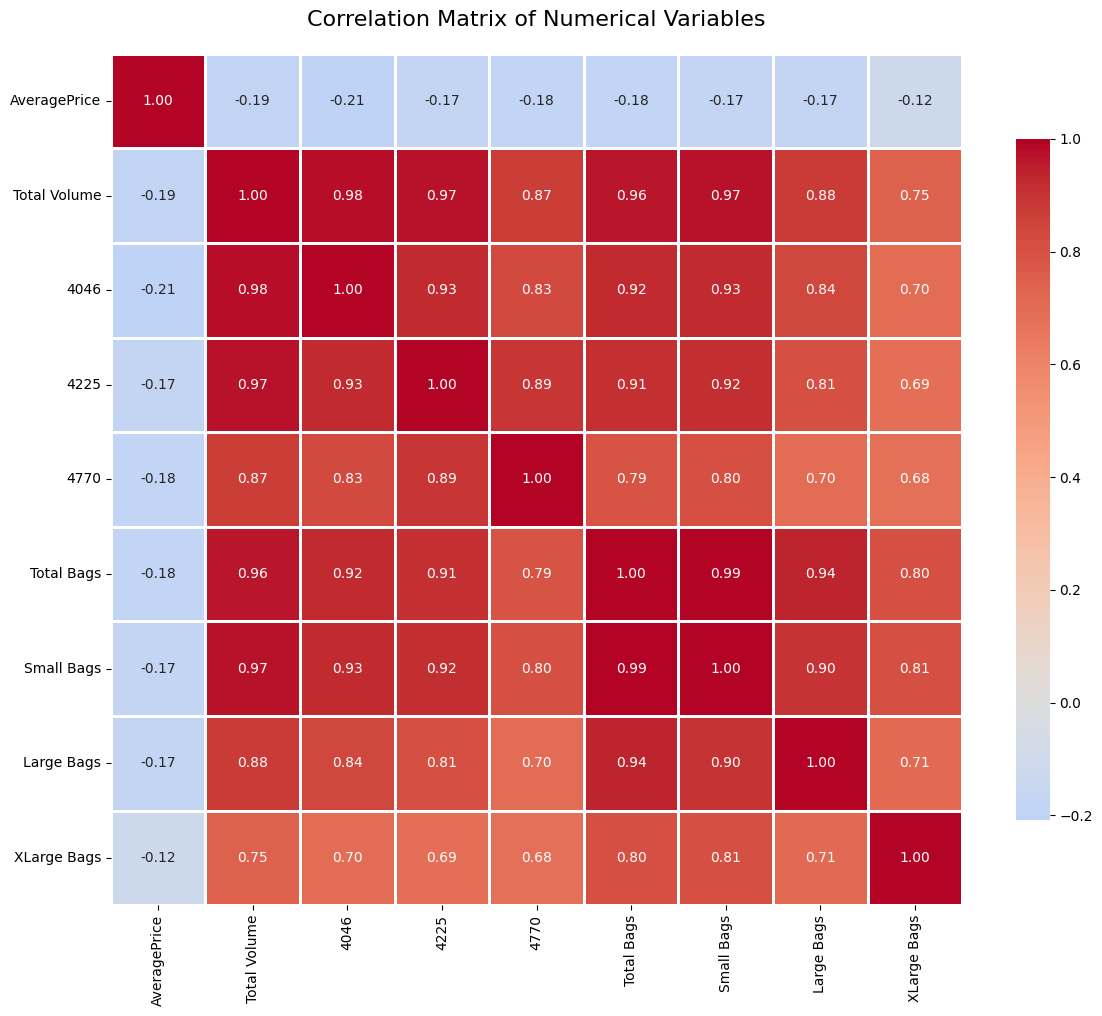


Highly Correlated Variable Pairs (|correlation| > 0.7):
Total Volume <-> 4046: 0.978
Total Volume <-> 4225: 0.974
Total Volume <-> 4770: 0.872
Total Volume <-> Total Bags: 0.963
Total Volume <-> Small Bags: 0.967
Total Volume <-> Large Bags: 0.881
Total Volume <-> XLarge Bags: 0.747
4046 <-> 4225: 0.926
4046 <-> 4770: 0.833
4046 <-> Total Bags: 0.920
4046 <-> Small Bags: 0.925
4046 <-> Large Bags: 0.839
4225 <-> 4770: 0.888
4225 <-> Total Bags: 0.906
4225 <-> Small Bags: 0.916
4225 <-> Large Bags: 0.810
4770 <-> Total Bags: 0.792
4770 <-> Small Bags: 0.803
Total Bags <-> Small Bags: 0.994
Total Bags <-> Large Bags: 0.943
Total Bags <-> XLarge Bags: 0.804
Small Bags <-> Large Bags: 0.903
Small Bags <-> XLarge Bags: 0.807
Large Bags <-> XLarge Bags: 0.711


In [24]:
# Write your code here
numerical_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Highly Correlated Variable Pairs (|correlation| > 0.7):")
print("="*60)

import numpy as np
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i],
                                   correlation_matrix.columns[j],
                                   corr_value))
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {corr_value:.3f}")

if len(high_corr_pairs) == 0:
    print("No highly correlated pairs found (threshold: |r| > 0.7)")

# How correlated values impact model accuracy:
#
# 1. MULTICOLLINEARITY:
#    - High correlation between predictors (|r| > 0.7-0.9) causes multicollinearity
#    - Makes regression coefficients unstable and hard to interpret
#    - Predictions may still be accurate but feature importance becomes unreliable
#
# 2. REDUNDANT INFORMATION:
#    - Highly correlated features provide similar information
#    - Including both doesn't significantly improve model performance
#    - Can lead to overfitting and increases model complexity unnecessarily
#
# 3. IMPACT ON DIFFERENT MODELS:
#    - Linear/Logistic Regression: SEVERELY affected - unstable coefficients
#    - Decision Trees/Random Forests: LESS affected - can handle correlation
#    - Regularized models (Ridge/Lasso): MODERATELY affected - regularization helps

#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [25]:
# Write your code here
print("="*60)
print("VARIABLE DESCRIPTION")
print("="*60)

continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

print("\n" + "="*60)
print("CONTINUOUS VARIABLES:")
print("="*60)

for var in continuous_vars:
    print(f"\n{var}:")
    print(f"  • Range: [{df[var].min():.2f}, {df[var].max():.2f}]")
    print(f"  • Mean: {df[var].mean():.2f}")
    print(f"  • Median: {df[var].median():.2f}")
    print(f"  • Standard Deviation: {df[var].std():.2f}")

    skewness = df[var].skew()
    if abs(skewness) < 0.5:
        distribution = "Approximately Normal"
    elif skewness > 0.5:
        distribution = "Right-skewed (positively skewed)"
    else:
        distribution = "Left-skewed (negatively skewed)"
    print(f"  • Distribution: {distribution} (skewness: {skewness:.2f})")

print("\n" + "="*60)
print("CATEGORICAL VARIABLES:")
print("="*60)

for var in categorical_vars:
    print(f"\n{var}:")
    unique_values = df[var].unique()
    print(f"  • Number of unique values: {len(unique_values)}")
    print(f"  • Unique values: {sorted(unique_values)[:10]}")  # Show first 10
    if len(unique_values) > 10:
        print(f"    ... and {len(unique_values) - 10} more")

    if len(unique_values) <= 10:
        print(f"  • Value counts:")
        for value, count in df[var].value_counts().items():
            print(f"      - {value}: {count}")

print("\n" + "="*60)
print("SUMMARY STATISTICS TABLE:")
print("="*60)
print(df.describe())

print("\n" + "="*60)
print("DATASET INFO:")
print("="*60)
print(df.info())

VARIABLE DESCRIPTION

CONTINUOUS VARIABLES:

AveragePrice:
  • Range: [0.44, 3.25]
  • Mean: 1.41
  • Median: 1.37
  • Standard Deviation: 0.40
  • Distribution: Right-skewed (positively skewed) (skewness: 0.58)

Total Volume:
  • Range: [84.56, 62505646.52]
  • Mean: 850552.31
  • Median: 107354.25
  • Standard Deviation: 3453367.22
  • Distribution: Right-skewed (positively skewed) (skewness: 9.01)

4046:
  • Range: [0.00, 22743616.17]
  • Mean: 292983.95
  • Median: 8645.30
  • Standard Deviation: 1264922.13
  • Distribution: Right-skewed (positively skewed) (skewness: 8.65)

4225:
  • Range: [0.00, 20470572.61]
  • Mean: 295122.55
  • Median: 29056.73
  • Standard Deviation: 1204058.31
  • Distribution: Right-skewed (positively skewed) (skewness: 8.94)

4770:
  • Range: [0.00, 2546439.11]
  • Mean: 22837.27
  • Median: 184.99
  • Standard Deviation: 107458.44
  • Distribution: Right-skewed (positively skewed) (skewness: 10.16)

Total Bags:
  • Range: [0.00, 19373134.37]
  • Mean: 2

3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [26]:
# Write your code here
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y')

earliest_date = df['Date'].min()
print(f"Earliest Date: {earliest_date}")

records_before_2010 = df[df['Date'] < '2010-01-01']
print(f"\nNumber of records from earliest date up to 2010: {len(records_before_2010)}")

if len(records_before_2010) > 0:
    print("\nRecords from the earliest date up to 2010:")
    print(records_before_2010[['Date', 'AveragePrice', 'region', 'type', 'year']].sort_values('Date'))

df = df[df['Date'] >= '2010-01-01']

print(f"\n Records before 2010 have been removed")
print(f"  • Rows remaining: {df.shape[0]}")
print(f"  • New earliest date: {df['Date'].min()}")
print(f"  • Latest date: {df['Date'].max()}")

Earliest Date: 1904-01-21 00:00:00

Number of records from earliest date up to 2010: 1

Records from the earliest date up to 2010:
            Date  AveragePrice            region     type  year
18250 1904-01-21          1.87  WestTexNewMexico  organic  1904

 Records before 2010 have been removed
  • Rows remaining: 18250
  • New earliest date: 2015-01-04 00:00:00
  • Latest date: 2018-03-25 00:00:00


3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [27]:
# Write your code here
highest_price = df['AveragePrice'].max()
print(f"Highest Average Price: ${highest_price:.2f}")

highest_price_row = df[df['AveragePrice'] == highest_price]
region_with_highest = highest_price_row['region'].values[0]

print(f"\nRegion: {region_with_highest}")

# Method used to obtain the result:
#
# 1. I used df['AveragePrice'].max() to find the maximum value in the
#    AveragePrice column across all records
#
# 2. I then used boolean indexing: df[df['AveragePrice'] == highest_price]
#    to filter the dataframe and retrieve the complete row(s) that
#    contain this maximum price
#
# 3. I extracted the region value from the filtered row using
#    highest_price_row['region'].values[0]

Highest Average Price: $3.25

Region: SanFrancisco


3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [28]:
# Write your code here
highest_volume = df['Total Volume'].max()
print(f"Highest Total Volume: {highest_volume:,.2f}")

highest_volume_row = df[df['Total Volume'] == highest_volume]
region_with_highest_volume = highest_volume_row['region'].values[0]

print(f"\nRegion: {region_with_highest_volume}")

# Method used to obtain the result:
#
# 1. I used df['Total Volume'].max() to find the maximum value in the
#    Total Volume column across all records in the dataset
#
# 2. I then applied boolean indexing: df[df['Total Volume'] == highest_volume]
#    to filter the dataframe and retrieve the row that contains this
#    maximum total volume value
#
# 3. I extracted the region name from the filtered row using
#    highest_volume_row['region'].values[0] to access the first
#    (and only) value in the region column

Highest Total Volume: 62,505,646.52

Region: TotalUS
